EDA for processed passwords dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/New SW PR/backend/Ignored datasets/full_before_target_label.csv", encoding="utf-8",keep_default_na=False)

C:\Users\omara\AppData\Local\Temp\ipykernel_14500\354685650.py:1: DtypeWarning: Columns (67,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:/New SW PR/backend/Ignored datasets/full_before_target_label.csv", encoding="utf-8",keep_default_na=False)


In [3]:
print("Shape:", df.shape)
df.head()

Shape: (14330123, 77)


,password,length,num_letters,num_upper,num_lower,num_digits,num_special_char,has_upper,has_num,has_special,...,zxcvbn_score,zxcvbn_guesses,zxcvbn_crack_time_seconds,zxcvbn_log10_guesses,PCFG_probability,OMEN_level,omen_level_norm,omen_log10,pcfg_log10_prob,pcfg_neglog10_prob
0,123456,6,0,0,0,6,0,0,1,0,...,0.0,2.0,0.0002,0.30103,0.000191,0,0.000000,0.000000,-3.719983,3.719983
1,12345,5,0,0,0,5,0,0,1,0,...,0.0,7.0,0.0007,0.845098,0.000088,2,0.028169,0.477121,-4.055246,4.055246
2,123456789,9,0,0,0,9,0,0,1,0,...,0.0,6.0,0.0006,0.778151,0.000167,3,0.042254,0.602060,-3.776698,3.776698
3,password,8,8,0,8,0,0,0,0,0,...,0.0,3.0,0.0003,0.477121,0.000047,4,0.056338,0.698970,-4.328364,4.328364
4,iloveyou,8,8,0,8,0,0,0,0,0,...,0.0,48.0,0.0048,1.681241,0.000052,4,0.056338,0.698970,-4.281302,4.281302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14330123 entries, 0 to 14330122
Data columns (total 77 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   password                        object 
 1   length                          int64  
 2   num_letters                     int64  
 3   num_upper                       int64  
 4   num_lower                       int64  
 5   num_digits                      int64  
 6   num_special_char                int64  
 7   has_upper                       int64  
 8   has_num                         int64  
 9   has_special                     int64  
 10  first_is_upper                  int64  
 11  first_is_digit                  int64  
 12  first_is_special                int64  
 13  last_is_upper                   int64  
 14  last_is_digit                   int64  
 15  last_is_special                 int64  
 16  ratio_letters                   float64
 17  ratio_uppercase          

In [5]:
df.describe().T


c:\Users\omara\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\omara\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\omara\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
length,14330123.0,8.747484,2.882071,1.000000,7.000000,8.000000,10.000000,285.000000
num_letters,14330123.0,5.722371,3.852705,0.000000,3.000000,6.000000,8.000000,255.000000
num_upper,14330123.0,0.380583,1.546532,0.000000,0.000000,0.000000,0.000000,187.000000
num_lower,14330123.0,5.341788,3.965082,0.000000,2.000000,6.000000,8.000000,255.000000
num_digits,14330123.0,2.920617,3.149256,0.000000,0.000000,2.000000,4.000000,255.000000
...,...,...,...,...,...,...,...,...
OMEN_level,14330123.0,13.545154,6.141079,-1.000000,9.000000,12.000000,16.000000,71.000000
omen_level_norm,14330123.0,0.190777,0.086494,-0.014085,0.126761,0.169014,0.225352,1.000000
omen_log10,14330123.0,-inf,NaN,-inf,1.000000,1.113943,1.230449,1.857332
pcfg_log10_prob,14330123.0,-inf,NaN,-inf,-10.764867,-8.833407,-7.691305,-3.719983


In [6]:
df["year_position"]


0           none
1           none
2           none
3           none
4           none
            ... 
14330118    none
14330119    none
14330120    none
14330121    none
14330122    none
Name: year_position, Length: 14330123, dtype: object

In [7]:
cols_to_convert = [
    "year_position",
    "zxcvbn_score",
    "zxcvbn_guesses",
    "zxcvbn_crack_time_seconds",
    "zxcvbn_log10_guesses"
]

for col in cols_to_convert:
    # convert to numeric; invalid entries become NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # decide int vs float
    # if the column has decimals, keep float
    if df[col].dropna().apply(float.is_integer).all():
        df[col] = df[col].astype("Int64")  # pandas nullable int
    else:
        df[col] = df[col].astype(float)

# check results
print(df[cols_to_convert].dtypes)


year_position                  Int64
zxcvbn_score                   Int64
zxcvbn_guesses               float64
zxcvbn_crack_time_seconds    float64
zxcvbn_log10_guesses         float64
dtype: object


In [8]:
print(df[cols_to_convert].dtypes)
print(df[cols_to_convert].isna().sum())

year_position                  Int64
zxcvbn_score                   Int64
zxcvbn_guesses               float64
zxcvbn_crack_time_seconds    float64
zxcvbn_log10_guesses         float64
dtype: object
year_position                14330123
zxcvbn_score                      740
zxcvbn_guesses                    740
zxcvbn_crack_time_seconds         740
zxcvbn_log10_guesses              740
dtype: int64


Check for empty cells 

In [9]:
df.isna().sum().sort_values(ascending=False)

year_position                14330123
zxcvbn_score                      740
zxcvbn_crack_time_seconds         740
zxcvbn_guesses                    740
zxcvbn_log10_guesses              740
                               ...   
OMEN_level                          0
omen_level_norm                     0
omen_log10                          0
pcfg_log10_prob                     0
pcfg_neglog10_prob                  0
Length: 77, dtype: int64

In [10]:
missing_cols = df.columns[df.isna().any()]
missing_cols

Index(['year_position', 'zxcvbn_score', 'zxcvbn_guesses',
       'zxcvbn_crack_time_seconds', 'zxcvbn_log10_guesses'],
      dtype='object')

Check for passwords that have empty spaces

In [11]:
mask_space = df["password"].str.contains(r"\s", regex=True)


In [12]:
mask_strip = df["password"] != df["password"].str.strip()
print("Passwords with leading/trailing spaces:", mask_strip.sum())

Passwords with leading/trailing spaces: 715


In [13]:
print("Passwords with whitespace:", mask_space.sum())

Passwords with whitespace: 70050


In [14]:
df.loc[mask_space, "password"].head(10)

1643        rock you
2914      i love you
3203          te amo
6955        fuck you
7266       te iubesc
8593        love you
10303       i love u
10983    chris brown
11372        rock on
12822      john cena
Name: password, dtype: object

In [15]:
# ensure password is string
df["password"] = df["password"].astype(str)

# keep only passwords WITHOUT any whitespace
df = df[~df["password"].str.contains(r"\s", regex=True)]

print("Remaining passwords:", len(df))

Remaining passwords: 14260073


In [16]:
df["password"].str.contains(r"\s").sum()

np.int64(0)

Check binary 

In [17]:
binary_cols = [
    "has_upper", "has_num", "has_special",
    "first_is_upper", "first_is_digit", "first_is_special",
    "last_is_upper", "last_is_digit", "last_is_special",
    "contains_dictionary_word", "contains_name",
    "contains_common_name", "contains_year", "contains_birth_year"
]

for col in binary_cols:
    print(col, df[col].unique())

has_upper [0 1]
has_num [1 0]
has_special [0 1]
first_is_upper [0 1]
first_is_digit [1 0]
first_is_special [0 1]
last_is_upper [0 1]
last_is_digit [1 0]
last_is_special [0 1]
contains_dictionary_word [1 0]
contains_name [0 1]
contains_common_name [0 1]
contains_year [0 1]
contains_birth_year [0 1]


Check for correlation

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

In [19]:
corr = numeric_df.corr(method="pearson")

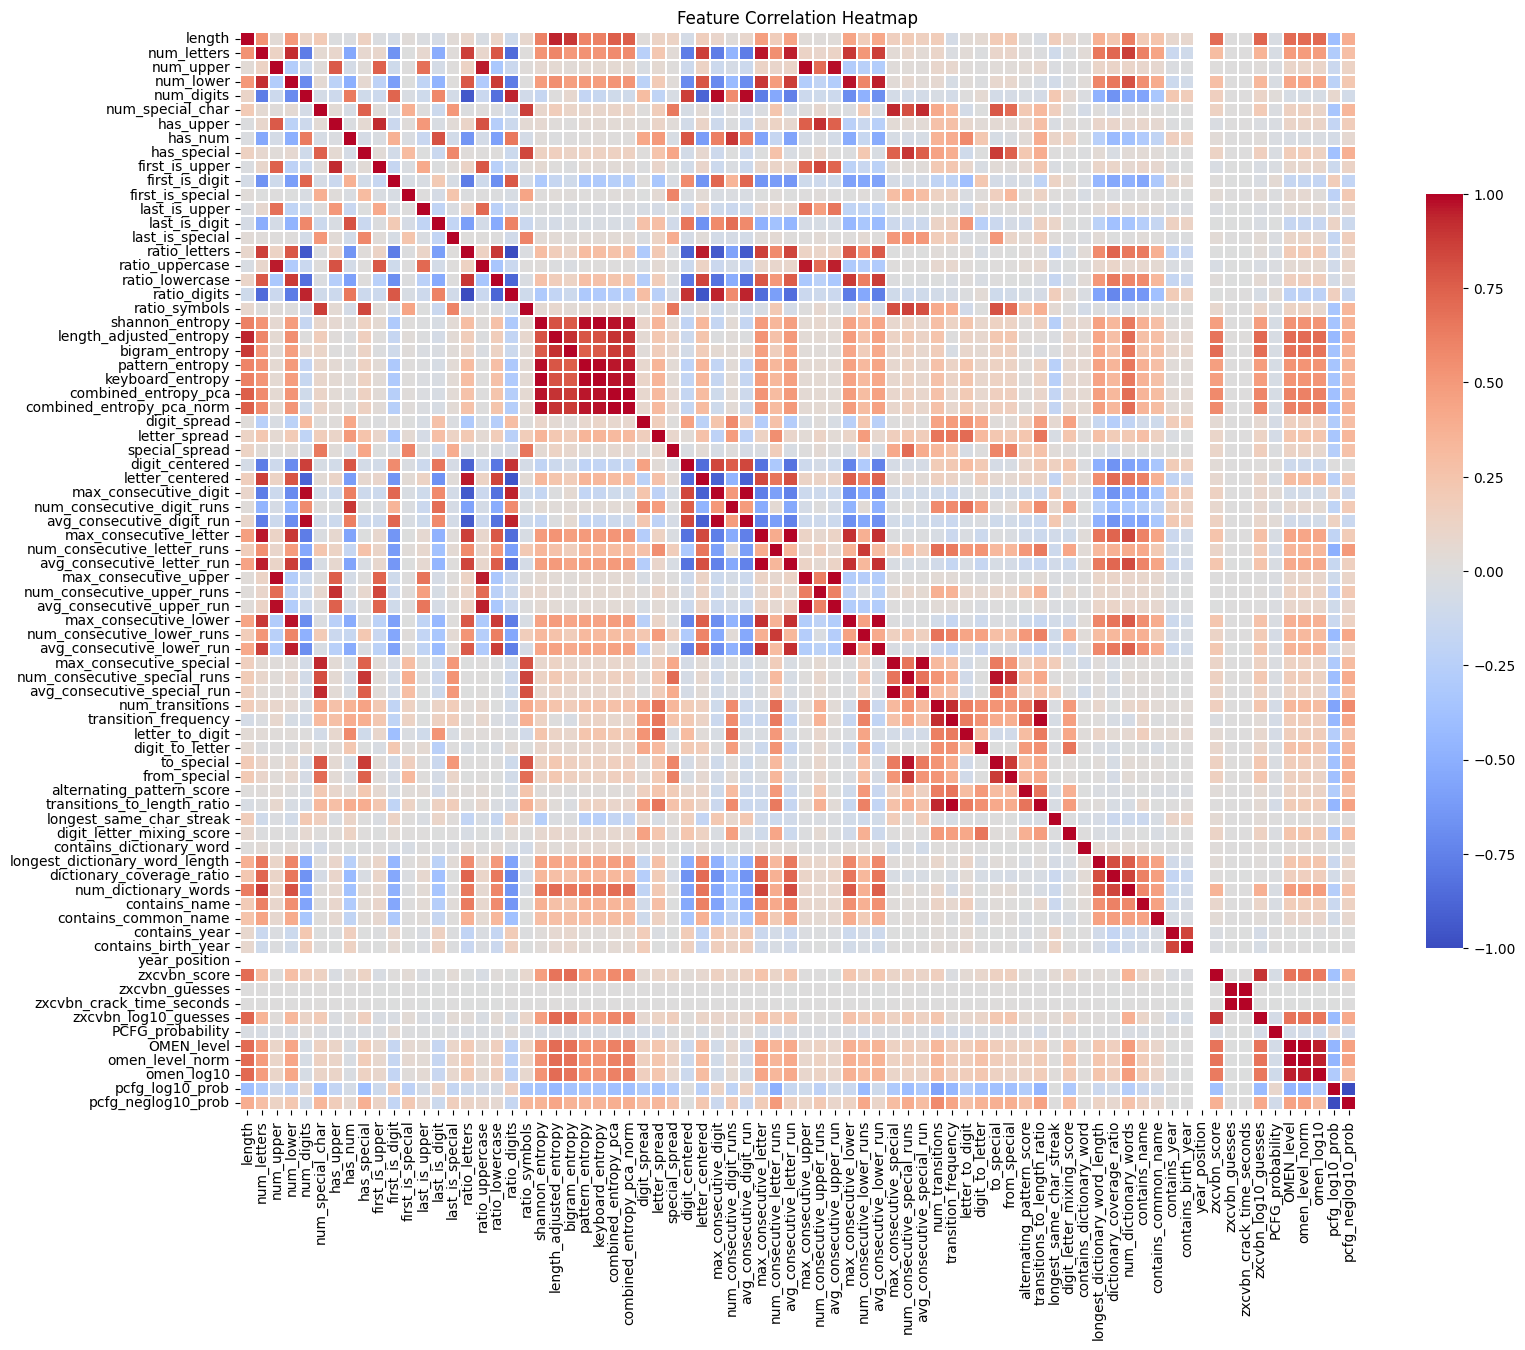

In [20]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.2,
    cbar_kws={"shrink": 0.7}
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
high_corr = (
    corr.abs()
    .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr[high_corr > 0.9]


zxcvbn_guesses                zxcvbn_crack_time_seconds      1.000000
OMEN_level                    omen_level_norm                1.000000
pcfg_log10_prob               pcfg_neglog10_prob             1.000000
combined_entropy_pca          combined_entropy_pca_norm      1.000000
transition_frequency          transitions_to_length_ratio    0.999030
max_consecutive_digit         avg_consecutive_digit_run      0.998804
max_consecutive_upper         avg_consecutive_upper_run      0.997785
shannon_entropy               keyboard_entropy               0.995458
max_consecutive_lower         avg_consecutive_lower_run      0.993918
max_consecutive_special       avg_consecutive_special_run    0.993842
max_consecutive_letter        avg_consecutive_letter_run     0.993012
ratio_letters                 ratio_digits                   0.992201
num_digits                    max_consecutive_digit          0.991277
pattern_entropy               keyboard_entropy               0.987737
num_digits          

In [22]:
drop_cols = [
    # PCFG
    "pcfg_log10_prob",

    # OMEN
    "OMEN_level",
    "omen_level_norm",

    # PCA
    "combined_entropy_pca",

    # Avg run lengths
    "avg_consecutive_digit_run",
    "avg_consecutive_upper_run",
    "avg_consecutive_lower_run",
    "avg_consecutive_letter_run",
    "avg_consecutive_special_run",

    # Entropy redundancy
    "shannon_entropy",
    "keyboard_entropy",
    "pattern_entropy",
    

    # Centered features
    "digit_centered",
    "letter_centered",

    # Transition redundancy
    "transition_frequency",

    # Ratios
    "ratio_digits",
    "ratio_letters",
    "ratio_uppercase",
    "ratio_lowercase",
    "ratio_symbols",
    
    # zxcvbn
    "zxcvbn_score",
    "zxcvbn_crack_time_seconds"
]

df_reduced = df.drop(columns=drop_cols)
print("New shape:", df_reduced.shape)

New shape: (14260073, 55)


In [23]:
corr_reduced = df_reduced.select_dtypes(np.number).corr()

high_corr_reduced = (
    corr_reduced.abs()
    .where(np.triu(np.ones(corr_reduced.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_reduced[high_corr_reduced > 0.9]

num_digits                    max_consecutive_digit          0.991277
num_upper                     max_consecutive_upper          0.986901
num_consecutive_special_runs  to_special                     0.972292
num_lower                     max_consecutive_lower          0.971324
num_letters                   max_consecutive_letter         0.968747
length                        length_adjusted_entropy        0.944117
num_special_char              max_consecutive_special        0.934307
num_transitions               transitions_to_length_ratio    0.932564
has_upper                     first_is_upper                 0.927650
num_letters                   num_lower                      0.917045
max_consecutive_letter        max_consecutive_lower          0.913659
length_adjusted_entropy       bigram_entropy                 0.912913
has_upper                     num_consecutive_upper_runs     0.907108
dtype: float64

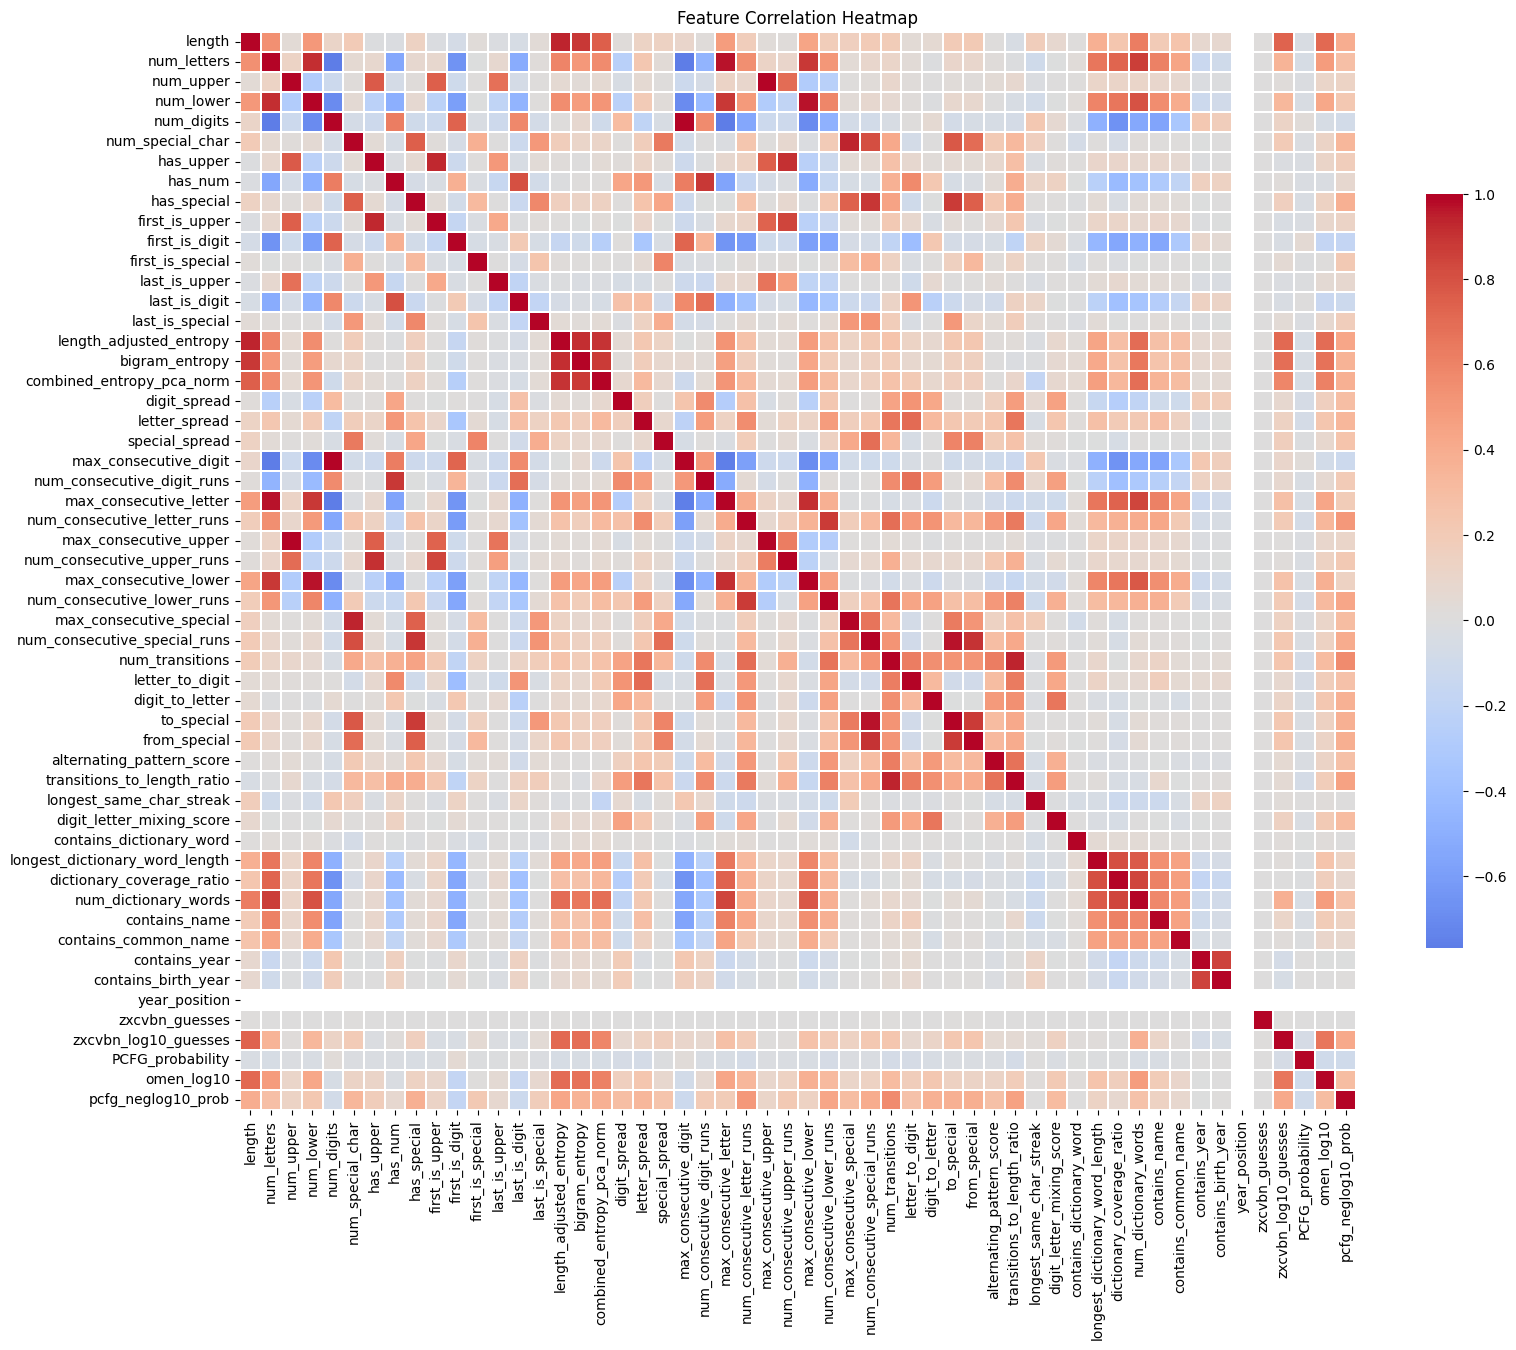

In [24]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_reduced,
    cmap="coolwarm",
    center=0,
    linewidths=0.2,
    cbar_kws={"shrink": 0.7}
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
df_reduced.head()

,password,length,num_letters,num_upper,num_lower,num_digits,num_special_char,has_upper,has_num,has_special,...,contains_name,contains_common_name,contains_year,contains_birth_year,year_position,zxcvbn_guesses,zxcvbn_log10_guesses,PCFG_probability,omen_log10,pcfg_neglog10_prob
0,123456,6,0,0,0,6,0,0,1,0,...,0,0,0,0,<NA>,2.0,0.301030,0.000191,0.000000,3.719983
1,12345,5,0,0,0,5,0,0,1,0,...,0,0,0,0,<NA>,7.0,0.845098,0.000088,0.477121,4.055246
2,123456789,9,0,0,0,9,0,0,1,0,...,0,0,0,0,<NA>,6.0,0.778151,0.000167,0.602060,3.776698
3,password,8,8,0,8,0,0,0,0,0,...,1,0,0,0,<NA>,3.0,0.477121,0.000047,0.698970,4.328364
4,iloveyou,8,8,0,8,0,0,0,0,0,...,0,0,0,0,<NA>,48.0,1.681241,0.000052,0.698970,4.281302


In [26]:
drop_cols_stage2 = [
    "max_consecutive_digit",
    "max_consecutive_upper",
    "max_consecutive_lower",
    "max_consecutive_letter",
    "max_consecutive_special",
    "has_upper",
    "num_letters",
    "num_transitions",
    "to_special",
    "from_special",
    "year_position"
]

df_reduced2 = df_reduced.drop(columns=drop_cols_stage2)
print("Shape after stage 2:", df_reduced2.shape)

Shape after stage 2: (14260073, 44)


In [32]:
corr_reduced2 = df_reduced2.select_dtypes(np.number).corr()

high_corr_reduced2 = (
    corr_reduced2.abs()
    .where(np.triu(np.ones(corr_reduced2.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_reduced2[high_corr_reduced2 > 0.9]

length                   length_adjusted_entropy    0.944117
length_adjusted_entropy  bigram_entropy             0.912913
dtype: float64

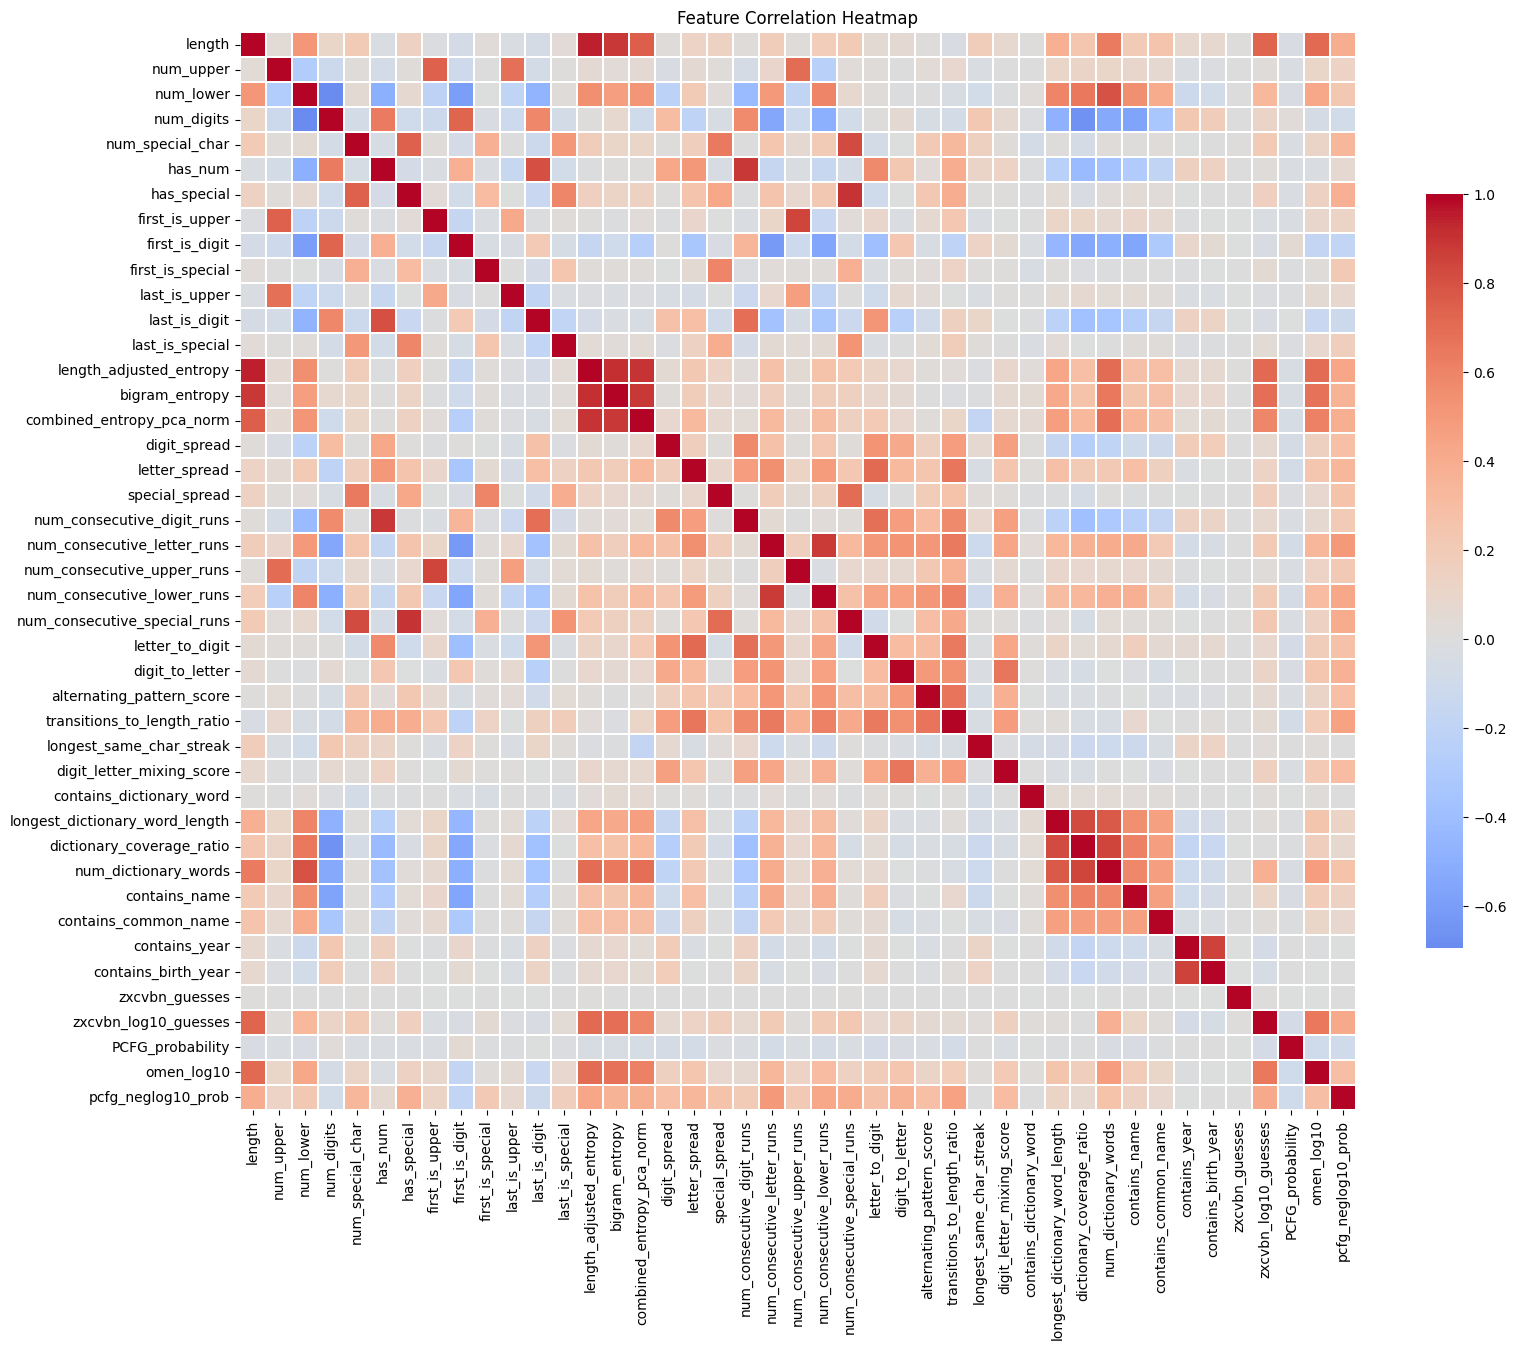

In [28]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_reduced2,
    cmap="coolwarm",
    center=0,
    linewidths=0.2,
    cbar_kws={"shrink": 0.7}
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
corr_reduced2 = df_reduced2.select_dtypes(np.number).corr()

high_corr_reduced2 = (
    corr_reduced2.abs()
    .where(np.triu(np.ones(corr_reduced2.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_reduced2[high_corr_reduced2 > 0.85]

length                          length_adjusted_entropy         0.944117
length_adjusted_entropy         bigram_entropy                  0.912913
                                combined_entropy_pca_norm       0.898511
has_special                     num_consecutive_special_runs    0.895966
length                          bigram_entropy                  0.885802
has_num                         num_consecutive_digit_runs      0.884576
bigram_entropy                  combined_entropy_pca_norm       0.881712
num_consecutive_letter_runs     num_consecutive_lower_runs      0.879082
contains_year                   contains_birth_year             0.849781
dictionary_coverage_ratio       num_dictionary_words            0.846581
first_is_upper                  num_consecutive_upper_runs      0.841081
longest_dictionary_word_length  dictionary_coverage_ratio       0.820190
num_special_char                num_consecutive_special_runs    0.816116
has_num                         last_is_digit      

In [36]:
drop_cols_stage3 = [
    "has_special",
    "has_num",
    "num_consecutive_lower_runs",
    "num_dictionary_words",
    "contains_birth_year"
]

df_reduced3 = df_reduced2.drop(columns=drop_cols_stage3)
print("Shape after stage 3:", df_reduced3.shape)

Shape after stage 3: (14260073, 39)


In [37]:
df_reduced3.head()

,password,length,num_upper,num_lower,num_digits,num_special_char,first_is_upper,first_is_digit,first_is_special,last_is_upper,...,longest_dictionary_word_length,dictionary_coverage_ratio,contains_name,contains_common_name,contains_year,zxcvbn_guesses,zxcvbn_log10_guesses,PCFG_probability,omen_log10,pcfg_neglog10_prob
0,123456,6,0,0,6,0,0,1,0,0,...,2,1.333333,0,0,0,2.0,0.301030,0.000191,0.000000,3.719983
1,12345,5,0,0,5,0,0,1,0,0,...,2,1.600000,0,0,0,7.0,0.845098,0.000088,0.477121,4.055246
2,123456789,9,0,0,9,0,0,1,0,0,...,2,1.000000,0,0,0,6.0,0.778151,0.000167,0.602060,3.776698
3,password,8,0,8,0,0,0,0,0,0,...,8,6.500000,1,0,0,3.0,0.477121,0.000047,0.698970,4.328364
4,iloveyou,8,0,8,0,0,0,0,0,0,...,5,4.000000,0,0,0,48.0,1.681241,0.000052,0.698970,4.281302


In [38]:
print(df_reduced3.columns)

Index(['password', 'length', 'num_upper', 'num_lower', 'num_digits',
       'num_special_char', 'first_is_upper', 'first_is_digit',
       'first_is_special', 'last_is_upper', 'last_is_digit', 'last_is_special',
       'length_adjusted_entropy', 'bigram_entropy',
       'combined_entropy_pca_norm', 'digit_spread', 'letter_spread',
       'special_spread', 'num_consecutive_digit_runs',
       'num_consecutive_letter_runs', 'num_consecutive_upper_runs',
       'num_consecutive_special_runs', 'letter_to_digit', 'digit_to_letter',
       'alternating_pattern_score', 'transitions_to_length_ratio',
       'longest_same_char_streak', 'digit_letter_mixing_score',
       'contains_dictionary_word', 'longest_dictionary_word_length',
       'dictionary_coverage_ratio', 'contains_name', 'contains_common_name',
       'contains_year', 'zxcvbn_guesses', 'zxcvbn_log10_guesses',
       'PCFG_probability', 'omen_log10', 'pcfg_neglog10_prob'],
      dtype='object')


In [ ]:
df.to_csv("E:/New SW PR/backend/Ignored datasets/rockyou_cleaned_targetready.csv", index=False, encoding="utf-8")